In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
COLUMNS = ['age','workclass', 'fnlwgt', 'education', 'education_num', 
           'marital','occupation', 'relationship', 'race', 'sex', 
           'capital_gain','capital_loss','hours_week','native_country',
           'label']

In [3]:
df_train = pd.read_csv('D:\Tensor Flow\Adult.csv', skipinitialspace=True, names = COLUMNS, index_col=False)
df_test = pd.read_csv('D:\Tensor Flow\Adult_Test.csv',skiprows = 1, skipinitialspace=True, names = COLUMNS, index_col=False)

In [4]:
print(df_train.shape, df_test.shape)
print(df_train.dtypes)

(32561, 15) (16281, 15)
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital           object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_week         int64
native_country    object
label             object
dtype: object


In [5]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
label = {'<=50K': 0,'>50K': 1}
df_train.label = [label[item] for item in df_train.label]
label_t = {'<=50K.': 0,'>50K.': 1}
df_test.label = [label_t[item] for item in df_test.label] 

In [7]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [8]:
df_train = df_train.replace('?', np.nan)

In [9]:
df_train.dropna(inplace = True)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education_num     30162 non-null int64
marital           30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital_gain      30162 non-null int64
capital_loss      30162 non-null int64
hours_week        30162 non-null int64
native_country    30162 non-null object
label             30162 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [11]:
df_test = df_test.replace('?', np.nan)
df_test.dropna(inplace = True)

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
age               15060 non-null int64
workclass         15060 non-null object
fnlwgt            15060 non-null int64
education         15060 non-null object
education_num     15060 non-null int64
marital           15060 non-null object
occupation        15060 non-null object
relationship      15060 non-null object
race              15060 non-null object
sex               15060 non-null object
capital_gain      15060 non-null int64
capital_loss      15060 non-null int64
hours_week        15060 non-null int64
native_country    15060 non-null object
label             15060 non-null int64
dtypes: int64(7), object(8)
memory usage: 1.8+ MB


In [13]:
print(df_train["label"].value_counts())
### The model will be correct in atleast 70% of the case
print(df_test["label"].value_counts())
## Unbalanced label
print(df_train.dtypes)

0    22654
1     7508
Name: label, dtype: int64
0    11360
1     3700
Name: label, dtype: int64
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital           object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_week         int64
native_country    object
label              int64
dtype: object


In [14]:
CONTI_FEATURES  = ['age', 'fnlwgt','capital_gain', 'education_num', 'capital_loss', 'hours_week']
### Define the categorical list
CATE_FEATURES = ['workclass', 'education', 'marital', 'occupation', 'relationship', 'race', 'sex']

In [15]:
for var in CATE_FEATURES:
    cat_list = pd.get_dummies(df_train[var], drop_first = True)
    data = df_train.join(cat_list)
    df_train = data

In [16]:
df_train.drop(CATE_FEATURES, axis = 1, inplace = True)
df_train.drop(['native_country'], axis = 1, inplace = True)
df_train.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_week', 'label', 'Local-gov', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th', '12th',
       '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc',
       'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool',
       'Prof-school', 'Some-college', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'Male'],
      dtype='object')

In [17]:
for var1 in CATE_FEATURES:
    cat_list = pd.get_dummies(df_test[var1], drop_first = True)
    data = df_test.join(cat_list)
    df_test = data

In [18]:
df_test.drop(CATE_FEATURES, axis = 1, inplace = True)
df_test.drop(['native_country'], axis = 1, inplace = True)
df_test.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_week', 'label', 'Local-gov', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th', '12th',
       '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc',
       'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool',
       'Prof-school', 'Some-college', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'Male'],
      dtype='object')

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 57 columns):
age                      30162 non-null int64
fnlwgt                   30162 non-null int64
education_num            30162 non-null int64
capital_gain             30162 non-null int64
capital_loss             30162 non-null int64
hours_week               30162 non-null int64
label                    30162 non-null int64
Local-gov                30162 non-null uint8
Private                  30162 non-null uint8
Self-emp-inc             30162 non-null uint8
Self-emp-not-inc         30162 non-null uint8
State-gov                30162 non-null uint8
Without-pay              30162 non-null uint8
11th                     30162 non-null uint8
12th                     30162 non-null uint8
1st-4th                  30162 non-null uint8
5th-6th                  30162 non-null uint8
7th-8th                  30162 non-null uint8
9th                      30162 non-null uint8
Assoc-acdm       

## Logistic Regression

In [20]:
x_train = df_train.drop(['label'], axis = 1)
y_train = df_train['label']

In [21]:
x_test = df_test.drop(['label'], axis = 1)
y_test = df_test['label']

In [22]:
from sklearn import linear_model
logit = linear_model.LogisticRegression(C=1e10, max_iter=1e5)
logit.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100000.0,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [23]:
logit.score(x_test,y_test)

0.7930942895086321

In [24]:
logit.score(x_train,y_train)

0.7907632119885949

## Sequential

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
def build_model():
    # Define the model - Sequential Model 
    # Activation function - ReLU, tf.nn.sigmoid
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.sigmoid, 
                 input_shape=[len(x_train.keys())]),
    layers.Dense(64, activation=tf.nn.sigmoid),
    layers.Dense(1)
  ])
    # Model Optimizer - To optimize loss function
    optimizer = tf.keras.optimizers.Adam(0.01)
    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 
                         'mean_squared_error'])
    return model

In [27]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3648      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 7,873
Trainable params: 7,873
Non-trainable params: 0
_________________________________________________________________


In [30]:
example_batch = x_train[:10]
from sklearn.metrics import mean_squared_error
example_result = model.predict(example_batch)
example_result

array([[0.22937952],
       [0.27260357],
       [0.27260357],
       [0.27260357],
       [0.27260357],
       [0.27260357],
       [0.27260357],
       [0.27260357],
       [0.21431556],
       [0.22937952]], dtype=float32)

In [32]:
EPOCHS = 100
history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 2s 85us/sample - loss: 0.1881 - mean_absolute_error: 0.3689 - mean_squared_error: 0.1881 - val_loss: 0.2006 - val_mean_absolute_error: 0.4325 - val_mean_squared_error: 0.2006
Epoch 2/100
24129/24129 [==============================] - 2s 73us/sample - loss: 0.1885 - mean_absolute_error: 0.3691 - mean_squared_error: 0.1885 - val_loss: 0.1960 - val_mean_absolute_error: 0.3290 - val_mean_squared_error: 0.1960
Epoch 3/100
24129/24129 [==============================] - 2s 81us/sample - loss: 0.1882 - mean_absolute_error: 0.3680 - mean_squared_error: 0.1882 - val_loss: 0.1923 - val_mean_absolute_error: 0.3385 - val_mean_squared_error: 0.1923
Epoch 4/100
24129/24129 [==============================] - 2s 87us/sample - loss: 0.1883 - mean_absolute_error: 0.3688 - mean_squared_error: 0.1883 - val_loss: 0.1874 - val_mean_absolute_error: 0.3641 - val_mean_squared_error: 0.1874
Epoch 5/100
241

Epoch 36/100
24129/24129 [==============================] - 2s 89us/sample - loss: 0.1865 - mean_absolute_error: 0.3665 - mean_squared_error: 0.1865 - val_loss: 0.1897 - val_mean_absolute_error: 0.4022 - val_mean_squared_error: 0.1897
Epoch 37/100
24129/24129 [==============================] - 2s 94us/sample - loss: 0.1880 - mean_absolute_error: 0.3651 - mean_squared_error: 0.1880 - val_loss: 0.2250 - val_mean_absolute_error: 0.4714 - val_mean_squared_error: 0.2250
Epoch 38/100
24129/24129 [==============================] - 2s 82us/sample - loss: 0.1870 - mean_absolute_error: 0.3670 - mean_squared_error: 0.1870 - val_loss: 0.2241 - val_mean_absolute_error: 0.2761 - val_mean_squared_error: 0.2241
Epoch 39/100
24129/24129 [==============================] - 2s 89us/sample - loss: 0.1865 - mean_absolute_error: 0.3662 - mean_squared_error: 0.1865 - val_loss: 0.1863 - val_mean_absolute_error: 0.3779 - val_mean_squared_error: 0.1863
Epoch 40/100
24129/24129 [==============================] - 

Epoch 71/100
24129/24129 [==============================] - 3s 120us/sample - loss: 0.1883 - mean_absolute_error: 0.3673 - mean_squared_error: 0.1883 - val_loss: 0.1941 - val_mean_absolute_error: 0.3286 - val_mean_squared_error: 0.1941
Epoch 72/100
24129/24129 [==============================] - 2s 101us/sample - loss: 0.1876 - mean_absolute_error: 0.3669 - mean_squared_error: 0.1876 - val_loss: 0.1870 - val_mean_absolute_error: 0.3581 - val_mean_squared_error: 0.1870
Epoch 73/100
24129/24129 [==============================] - 2s 103us/sample - loss: 0.1860 - mean_absolute_error: 0.3659 - mean_squared_error: 0.1860 - val_loss: 0.1862 - val_mean_absolute_error: 0.3722 - val_mean_squared_error: 0.1862
Epoch 74/100
24129/24129 [==============================] - 2s 81us/sample - loss: 0.1864 - mean_absolute_error: 0.3659 - mean_squared_error: 0.1864 - val_loss: 0.1862 - val_mean_absolute_error: 0.3708 - val_mean_squared_error: 0.1862
Epoch 75/100
24129/24129 [==============================]

In [33]:
x_train.shape

(30162, 56)

In [34]:
y_train.shape

(30162,)

In [35]:
import matplotlib.pyplot as plt
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [label]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5]) 
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$label^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

In [40]:
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,0.186884,0.367113,0.186884,0.187278,0.356253,0.187278,95
96,0.186140,0.366844,0.186140,0.189341,0.400549,0.189341,96
97,0.186626,0.366169,0.186626,0.190142,0.341378,0.190142,97
98,0.187460,0.365895,0.187460,0.190757,0.406313,0.190757,98
99,0.187097,0.366863,0.187097,0.188301,0.395435,0.188301,99


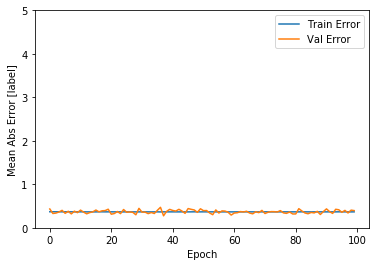

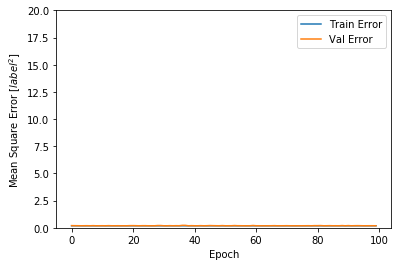

In [41]:
plot_history(history)

In [42]:
example_batch = x_test
from sklearn.metrics import mean_squared_error
example_result = model.predict(example_batch)
yhat = np.round(example_result)

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,yhat))

[[11360     0]
 [ 3609    91]]
